In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/kaggle/input/global-student-migration/global_student_migration.csv')
df

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,Canada,Germany,Stuttgart,University of Stuttgart,Political Science,Engineering,2023,No,Scholarship,2024,Placed,Germany,Facebook,98568,3.96,Tier 4,Post-Study Visa,Duolingo,6.9
4996,S04997,India,Ireland,Maynooth,Maynooth University,Political Science,Law,2023,Yes,Quality of Life,2026,Placed,Ireland,Deloitte,32643,3.93,F1,PSW,TOEFL,7.5
4997,S04998,UK,India,Bangalore,IISc Bangalore,Finance,Natural Sciences,2023,Yes,Scholarship,2026,Placed,India,Tesla,100777,3.76,Study Permit,Post-Study Visa,TOEFL,8.8
4998,S04999,Germany,Russia,Saint Petersburg,Saint Petersburg State University,Biotechnology,Business,2020,Yes,Scholarship,2022,Not Placed,NaN,NaN,0,3.72,Schengen Student Visa,Blue Card,IELTS,8.6


**Data Cleaning**

In [2]:
df.head()

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [3]:
df.shape

(5000, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

In [5]:
df.dtypes

student_id                    object
origin_country                object
destination_country           object
destination_city              object
university_name               object
course_name                   object
field_of_study                object
year_of_enrollment             int64
scholarship_received          object
enrollment_reason             object
graduation_year                int64
placement_status              object
placement_country             object
placement_company             object
starting_salary_usd            int64
gpa_or_score                 float64
visa_status                   object
post_graduation_visa          object
language_proficiency_test     object
test_score                   float64
dtype: object

In [6]:
df.describe()

,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.011000,2023.017800,44552.531000,3.246820,5.632200
std,1.420733,1.651432,50719.190623,0.430659,2.973838
min,2019.000000,2020.000000,0.000000,2.500000,0.000000
25%,2020.000000,2022.000000,0.000000,2.877500,5.300000
50%,2021.000000,2023.000000,30516.500000,3.240000,6.500000
75%,2022.000000,2024.000000,87838.500000,3.610000,7.800000
max,2023.000000,2026.000000,149932.000000,4.000000,9.000000


In [7]:
# Fill missing values for unplaced students
df['placement_country'] = df['placement_country'].fillna('Not Placed')
df['placement_company'] = df['placement_company'].fillna('Not Placed')
df['language_proficiency_test'] = df['language_proficiency_test'].fillna('None')

In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicates found and removed: {duplicates}")
df = df.drop_duplicates()

Duplicates found and removed: 0


In [9]:
df['origin_country'].value_counts()

origin_country
Russia          532
Germany         531
Canada          517
Ireland         510
USA             504
UK              499
India           498
South Africa    493
Finland         465
UAE             451
Name: count, dtype: int64

In [10]:
df['graduation_year'].unique()

array([2024, 2020, 2023, 2021, 2025, 2026, 2022])

In [11]:
df['placement_company'].nunique()

14

**Visualizations**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

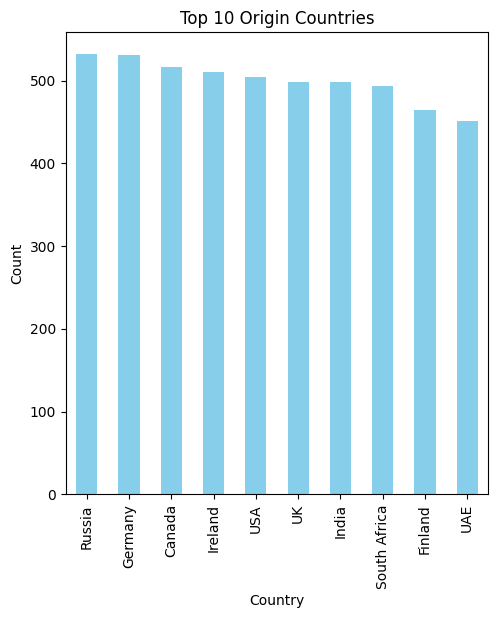

In [13]:
# Figure 1: Top Origin & Destination Countries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['origin_country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Origin Countries')
plt.xlabel('Country')
plt.ylabel('Count')

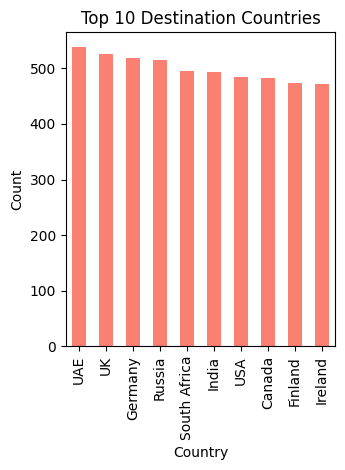

In [14]:
plt.subplot(1, 2, 2)
df['destination_country'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Destination Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('mobility_top_countries.png')

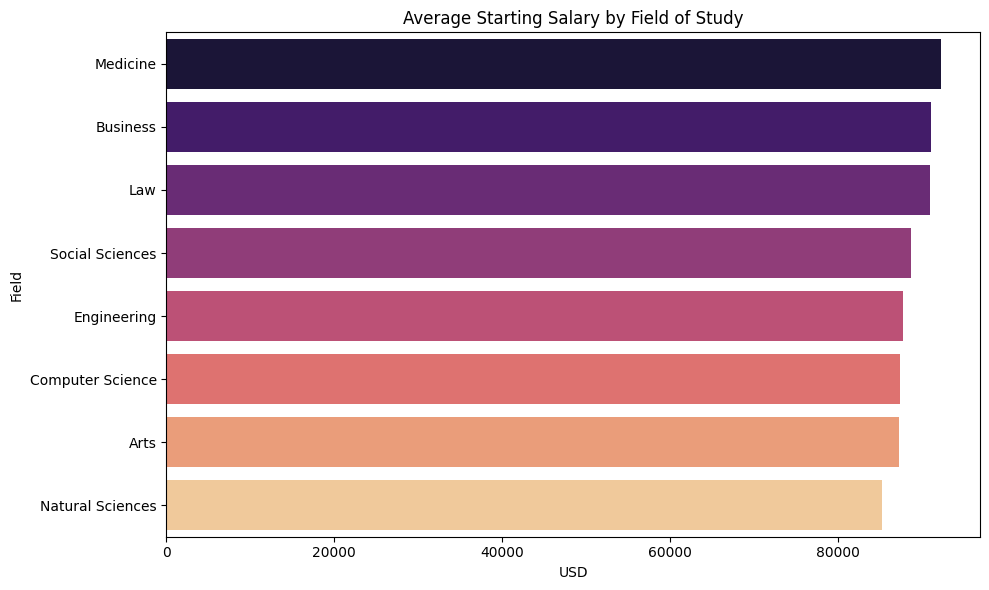

In [15]:
# Figure 2: Average Salary by Field
df_placed = df[df['placement_status'] == 'Placed']
avg_salary = df_placed.groupby('field_of_study')['starting_salary_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='magma')
plt.title('Average Starting Salary by Field of Study')
plt.xlabel('USD')
plt.ylabel('Field')
plt.tight_layout()
plt.savefig('avg_salary_by_field.png')

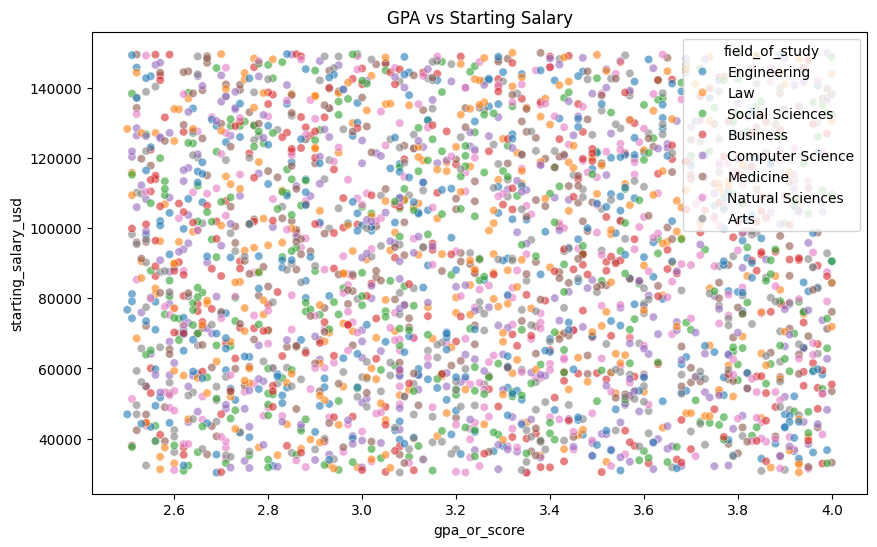

In [16]:
# Figure 3: GPA vs Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gpa_or_score', y='starting_salary_usd', data=df_placed, hue='field_of_study', alpha=0.6)
plt.title('GPA vs Starting Salary')
plt.savefig('gpa_vs_salary.png')


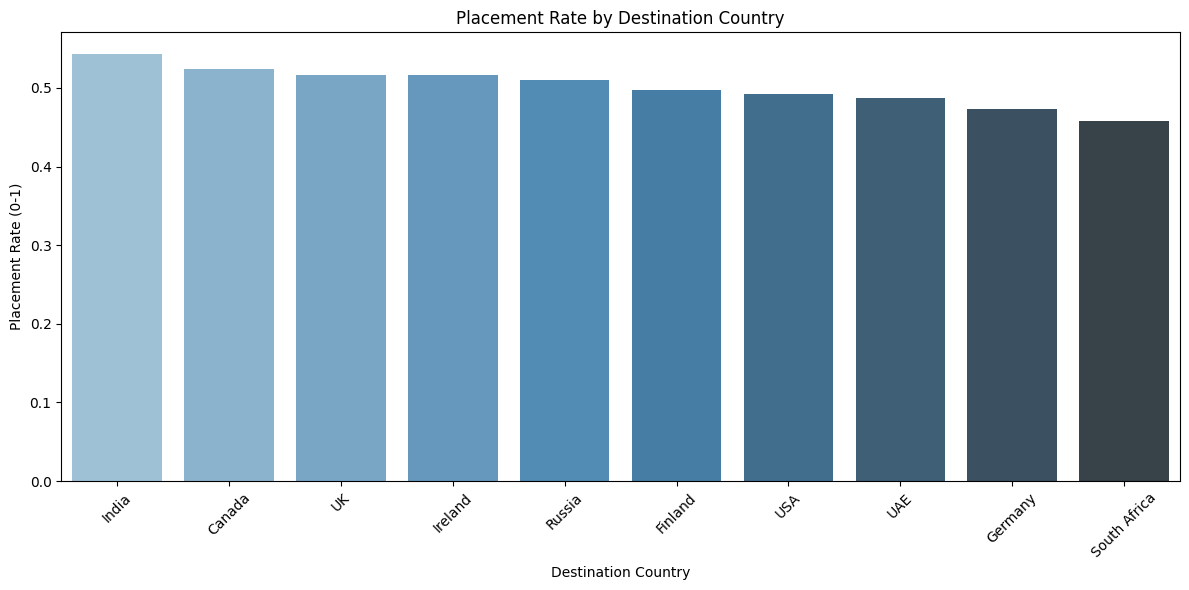

In [17]:
#Figure 4: Placement Rate by Destination Country (Advanced) ---
# Calculate placement rate = Placed / Total
placement_stats = df.groupby(['destination_country', 'placement_status']).size().unstack(fill_value=0)
placement_stats['Placement Rate'] = placement_stats['Placed'] / (placement_stats['Placed'] + placement_stats['Not Placed'])
placement_stats = placement_stats.sort_values('Placement Rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=placement_stats.index, y=placement_stats['Placement Rate'], palette='Blues_d')
plt.title('Placement Rate by Destination Country')
plt.xlabel('Destination Country')
plt.ylabel('Placement Rate (0-1)')
plt.xticks(rotation=45)
plt.tight_layout()


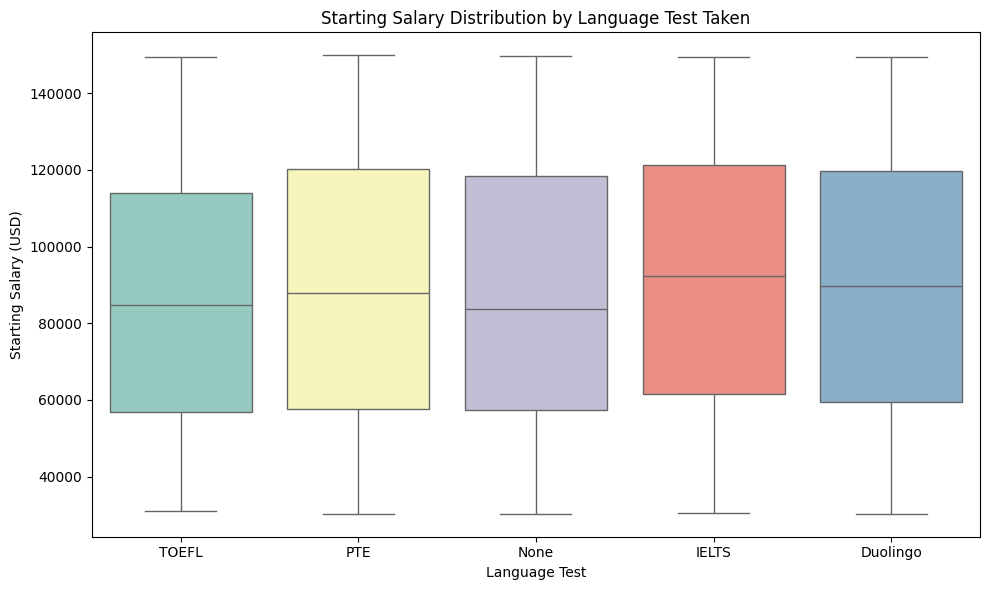

In [18]:
# Figure 5: Salary vs Language Test (Advanced) 
plt.figure(figsize=(10, 6))
sns.boxplot(x='language_proficiency_test', y='starting_salary_usd', data=df_placed, palette='Set3')
plt.title('Starting Salary Distribution by Language Test Taken')
plt.xlabel('Language Test')
plt.ylabel('Starting Salary (USD)')
plt.tight_layout()


Analysis Complete.


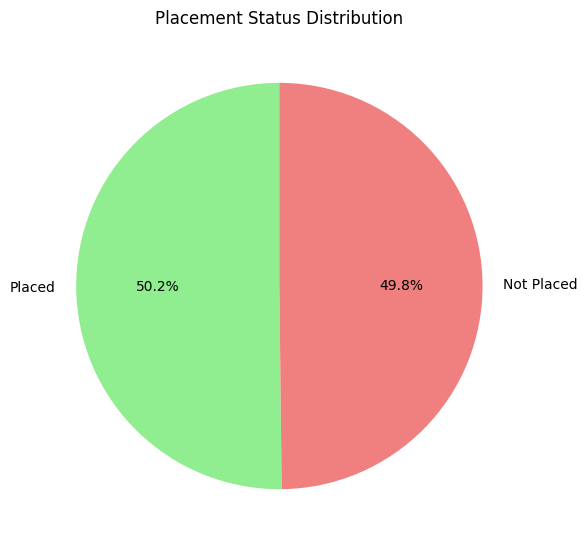

In [19]:
# Figure 6: Placement Status Distribution 
plt.figure(figsize=(6, 6))
df['placement_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Placement Status Distribution')
plt.ylabel('')
plt.tight_layout()
print("Analysis Complete.")